#### Load environment variables

In [1]:
import os
from dotenv import load_dotenv
load_dotenv(dotenv_path=".env")

### Difine LLM

In [12]:
import os
from dotenv import load_dotenv
load_dotenv(dotenv_path=".env")
from langchain_openai import AzureOpenAI

GPT4_TURBO_DEPLOYMENT_NAME = os.getenv('GPT4_TURBO_DEPLOYMENT_NAME')
API_KEY = os.getenv('sweden_API_KEY')
API_BASE = os.getenv('sweden_API_BASE')
API_TYPE = os.getenv('API_TYPE')
API_VERSION = os.getenv('API_VERSION')

llm = AzureOpenAI(
            azure_endpoint=API_BASE,
            api_version=API_VERSION,
            api_key=API_KEY,
            azure_deployment=GPT4_TURBO_DEPLOYMENT_NAME,
)

In [13]:
llm.invoke("what is 2+2?")

BadRequestError: Error code: 400 - {'error': {'code': 'OperationNotSupported', 'message': 'The completion operation does not work with the specified model, gpt-4. Please choose different model and try again. You can learn more about which models can be used with each operation here: https://go.microsoft.com/fwlink/?linkid=2197993.'}}

### Define Graph State

In [8]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


def get_sentiment(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


# Define Graph
graph_builder = StateGraph(State)

# Add nodes to the Graph
graph_builder.add_node("chatbot", chatbot)

# Connect nodes using edges
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# Compile Graph
graph = graph_builder.compile()

### Visualize the Graph

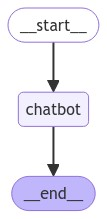

In [9]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))